In [1]:
import numpy as np 
import pandas as pd
from pandas import DataFrame
import nltk

import seaborn as sb

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [4]:
df=pd.read_json("yelp_academic_dataset_tip.json",lines=True)

In [5]:
df.shape

(1223094, 5)

In [6]:
df.head()

,user_id,business_id,text,date,compliment_count
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0
1,Ocha4kZBHb4JK0lOWvE0sg,OPiPeoJiv92rENwbq76orA,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0
2,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0
3,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0
4,LUlKtaM3nXd-E4N4uOk_fQ,AkL6Ous6A1atZejfZXn1Bg,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0


In [7]:
df

,user_id,business_id,text,date,compliment_count
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0
1,Ocha4kZBHb4JK0lOWvE0sg,OPiPeoJiv92rENwbq76orA,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0
2,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0
3,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0
4,LUlKtaM3nXd-E4N4uOk_fQ,AkL6Ous6A1atZejfZXn1Bg,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0
...,...,...,...,...,...
1223089,nus5X9JKgU_SzfAL4vhJrg,qdwwiRKwnhdlr9QcgJuzbg,"Very good class, great instructor!!",2018-08-05 20:58:09,0
1223090,95wqYGU6-OiHqRPZP0uAWw,wrs4Zbz17q_G49AIRxRPVw,Excellent food,2018-08-15 18:05:22,0
1223091,HtLaONYabidSxMS1eGHcXA,wEc4JE2NYQr1RnGjGr4q7w,Jess is the best bartender!! Go check her out!,2018-10-02 03:34:58,0
1223092,T4R5ZKfcGt1GIAgjCh67eA,n5Hc_iMVkyxcS0SXiBCbOQ,Excellent food and AMAZING service by Anneliese!!,2018-10-13 16:57:50,0


In [8]:
df1=pd.read_csv("processed.csv")

In [9]:
df1

,Column1
0,processed_acl/ ...
1,your:2 by_disney:1 many_drug:1 can't_even:1 cl...
2,old:1 complicated:1 fun_to:2 moves:2 breaking:...
3,enjoy_what:1 find_that:1 add_some:1 and_when:1...
4,holes:1 movie_however:2 shooting_fish:1 not_su...
...,...
27676,canon_mp500:1 favorite:1 at_all:1 printing:2 <...
27677,i_think:1 your:1 papers_like:1 using_the:1 ben...
27678,i:1 well:3 <num>_months:1 with_reading:1 that_...
27679,gps_units:1 office_building:1 is_extremely:1 h...


In [2]:
df2=pd.read_csv("final_cap.csv", encoding= 'unicode_escape')


In [3]:
df2

,name,asins,brand,categories,primaryCategories,keys,manufacturer,date,pos_neg,rating,Website,sourceURLs_review,reviews,reviews_title,username,sourceURLs
0,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,2017-03-02T00:00:00.000Z,1,3,Amazon,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,2016-08-31T00:00:00.000Z,1,4,Amazon,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,2016-12-06T00:00:00.000Z,1,5,Amazon,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,2016-03-28T00:00:00.000Z,1,5,Amazon,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,2017-04-22T00:00:00.000Z,1,5,Amazon,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22429,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,"841667103150,0841667103150,firetabletwithalexa...",Amazon,2016-12-24T00:00:00.000Z,1,5,BestBuy,http://reviews.bestbuy.com/3545/5025900/review...,I APPRECIATE the ease of purchasing and readin...,Im so happy with this product - Reading is GREAT!,Toddler,"https://www.barcodable.com/upc/841667103150,ht..."
22430,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,"841667103150,0841667103150,firetabletwithalexa...",Amazon,2017-03-10T00:00:00.000Z,1,5,BestBuy,http://reviews.bestbuy.com/3545/5025900/review...,"I love this tablet/kindle. I can access email,...",Very versatile,Patty,"https://www.barcodable.com/upc/841667103150,ht..."
22431,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,"841667103150,0841667103150,firetabletwithalexa...",Amazon,2016-10-21T00:00:00.000Z,1,5,BestBuy,http://reviews.bestbuy.com/3545/5025900/review...,This is a great tablet for the price. Amazon i...,Good product,litle,"https://www.barcodable.com/upc/841667103150,ht..."
22432,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,"841667103150,08

In [4]:
df2.head()

,name,asins,brand,categories,primaryCategories,keys,manufacturer,date,pos_neg,rating,Website,sourceURLs_review,reviews,reviews_title,username,sourceURLs
0,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,2017-03-02T00:00:00.000Z,1,3,Amazon,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,2016-08-31T00:00:00.000Z,1,4,Amazon,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,2016-12-06T00:00:00.000Z,1,5,Amazon,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,2016-03-28T00:00:00.000Z,1,5,Amazon,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,2017-04-22T00:00:00.000Z,1,5,Amazon,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [5]:
df2.tail()

,name,asins,brand,categories,primaryCategories,keys,manufacturer,date,pos_neg,rating,Website,sourceURLs_review,reviews,reviews_title,username,sourceURLs
22429,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,"841667103150,0841667103150,firetabletwithalexa...",Amazon,2016-12-24T00:00:00.000Z,1,5,BestBuy,http://reviews.bestbuy.com/3545/5025900/review...,I APPRECIATE the ease of purchasing and readin...,Im so happy with this product - Reading is GREAT!,Toddler,"https://www.barcodable.com/upc/841667103150,ht..."
22430,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,"841667103150,0841667103150,firetabletwithalexa...",Amazon,2017-03-10T00:00:00.000Z,1,5,BestBuy,http://reviews.bestbuy.com/3545/5025900/review...,"I love this tablet/kindle. I can access email,...",Very versatile,Patty,"https://www.barcodable.com/upc/841667103150,ht..."
22431,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,"841667103150,0841667103150,firetabletwithalexa...",Amazon,2016-10-21T00:00:00.000Z,1,5,BestBuy,http://reviews.bestbuy.com/3545/5025900/review...,This is a great tablet for the price. Amazon i...,Good product,litle,"https://www.barcodable.com/upc/841667103150,ht..."
22432,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,"841667103150,0841667103150,firetabletwithalexa...",Amazon,2016-08-10T00:00:00.000Z,1,5,BestBuy,http://reviews.bestbuy.com/3545/5025900/review...,This tablet is the perfect size and so easy to...,Great Tablet,gracie,"https://www.barcodable.com/upc/841667103150,ht..."
22433,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,"841667103150,0841667103150,firetabletwithalexa...",Amazon,2016-09-02T00:00:00.000Z,1,5,BestBuy,http://reviews.bestbuy.com/3545/5025900/review...,I had some thoughts about getting this for a 5...,Very sturdy for a 5 year old,Mrbilly,"https://www.barcodable.com/upc/841667103150,ht..."


In [6]:
df2.shape

(22434, 16)

In [7]:
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline

In [8]:
permanent = df2[['rating' , 'reviews' , 'reviews_title' , 'username']]
print(permanent.isnull().sum()) #Checking for null values
permanent.head()

rating            0
reviews           0
reviews_title    10
username          0
dtype: int64


,rating,reviews,reviews_title,username
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda


In [9]:
check =  permanent[permanent["reviews_title"].isnull()]
check.head()

,rating,reviews,reviews_title,username
19037,5,I love it. It does so much and is so easy to u...,NaN,Cindy
19048,5,I bought the echo show for my mom for her birt...,NaN,Kelsey
19085,5,This was bought for a gift. But it looks nice....,NaN,Mchiare
19153,5,Its a lot more then we expected.this is a wond...,NaN,BillyD
19260,5,Best New Adult Toy in years! Wish I had purcha...,NaN,DD


In [10]:
senti= permanent[permanent["reviews_title"].notnull()]
senti.head()

,rating,reviews,reviews_title,username
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda


In [11]:
from wordcloud import WordCloud

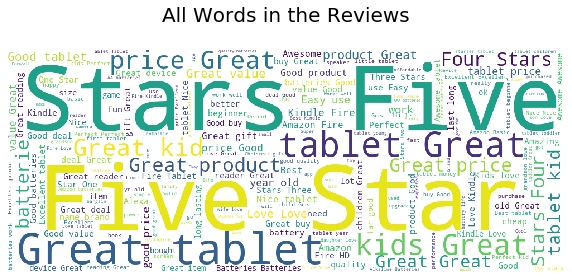

In [12]:
rt = senti['reviews_title']
wordcloud = WordCloud(background_color='white',width=1000, height=400
                        ).generate(" ".join(rt))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=20)
plt.axis('off')
plt.show()

In [13]:
words = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

rt = " ".join(senti['reviews_title'])

In [14]:
diz = {}
for word in rt.split(" "):
    if word in words:
        diz[word] = diz.get(word,0)+1
        

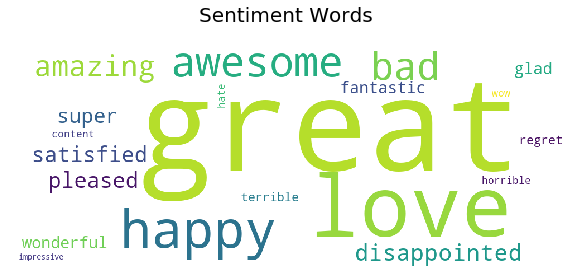

In [15]:
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate_from_frequencies(diz)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Sentiment Words\n',size=20)
plt.axis('off')
plt.show()

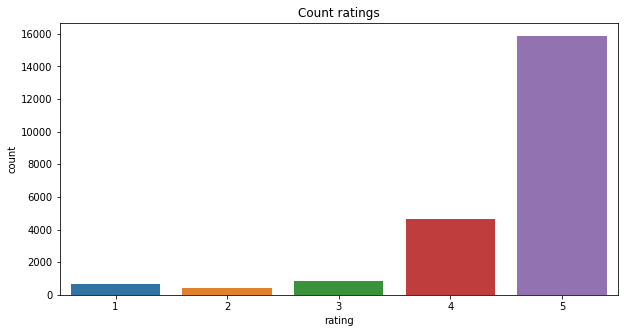

In [16]:
plt.figure(figsize=(10,5))
sb.countplot(df2['rating'])
plt.title('Count ratings')
plt.show()

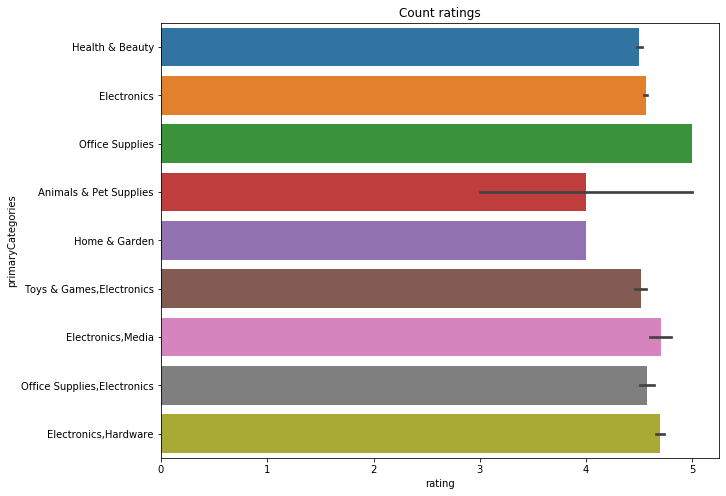

In [17]:
plt.figure(figsize=(10,8))
sb.barplot(x=df2["rating"], y=df2["primaryCategories"])
plt.title('Count ratings')
plt.show()

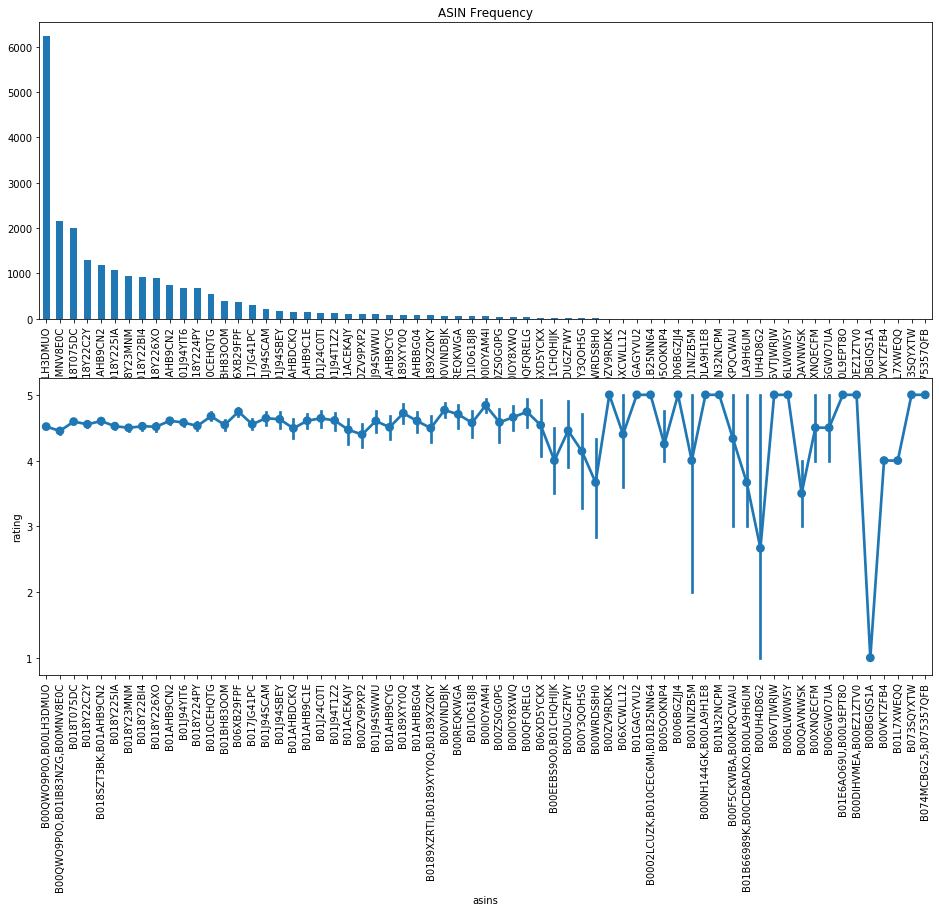

In [22]:
asins_count_ix = df2["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
df2["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sb.pointplot(x="asins", y="rating", order=asins_count_ix, data=df2)
plt.xticks(rotation=90)
plt.show()

In [23]:
corr_matrix = df2.corr()
corr_matrix

,pos_neg,rating
pos_neg,NaN,NaN
rating,NaN,1.0
